In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection
import seaborn as sns
import re
import joblib


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score

In [2]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


Using Data Imbalancing

SMOTE Analysis

In [3]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE


# Load the dataset
data = pd.read_csv('spam (1).csv',encoding="ISO-8859-1")

In [5]:
data = data[['v1','v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Text preprocessing (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['v2'])

# Target variable
y = data['v1']

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

In [7]:
print(X_smote)

  (0, 8267)	0.18238655630689804
  (0, 1069)	0.3264252905795869
  (0, 3594)	0.15318864840197105
  (0, 7645)	0.15566431601878158
  (0, 2048)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 4476)	0.2757654045621182
  (0, 8489)	0.22080132794235655
  (0, 3634)	0.1803175103691124
  (0, 1751)	0.2757654045621182
  (0, 4087)	0.10720385321563428
  (0, 5537)	0.15618023117358304
  (0, 1303)	0.24415547176756056
  (0, 2327)	0.25279391746019725
  (0, 5920)	0.2553151503985779
  (0, 4350)	0.3264252905795869
  (0, 8030)	0.22998520738984352
  (0, 3550)	0.1481298737377147
  (1, 5533)	0.5465881710238072
  (1, 8392)	0.4316010362639011
  (1, 4318)	0.5236458071582338
  (1, 4512)	0.4082988561907181
  (1, 5504)	0.27211951321382544
  (2, 77)	0.23012628226525952
  (2, 1156)	0.16541257593676326
  :	:
  (9648, 5564)	0.16035169169015231
  (9648, 253)	0.2030091732499329
  (9648, 2396)	0.19084764431689527
  (9648, 44)	0.2030091732499329
  (9649, 898)	0.25277803585799746
  (9649, 7756)	0.1701533754042519
  (964

In [8]:
print(y_smote)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
9645    spam
9646    spam
9647    spam
9648    spam
9649    spam
Name: v1, Length: 9650, dtype: object


In [9]:
# Describe
print("Description after SMOTE:")
X_smote_df = pd.DataFrame(X_smote.toarray())

print(X_smote_df.describe())



Description after SMOTE:
              0            1            2            3            4     \
count  9650.000000  9650.000000  9650.000000  9650.000000  9650.000000   
mean      0.001522     0.004755     0.000024     0.000334     0.000173   
std       0.017949     0.034833     0.002366     0.008326     0.005781   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.240087     0.654352     0.232443     0.265468     0.250180   

              5            6            7            8            9     ...  \
count  9650.000000  9650.000000  9650.000000  9650.000000  9650.000000  ...   
mean      0.000147     0.000143     0.000182     0.000053     0.001328  ...   
std       0.005925     0.005364     0.005857     0.005197     0.016824 

In [10]:
y_smote_df = pd.Series(y_smote, name='target')

print(y_smote_df.describe())

count     9650
unique       2
top        ham
freq      4825
Name: target, dtype: object


In [11]:
# Value counts
print("\nValue counts after SMOTE:")
print(y_smote_df.value_counts())



Value counts after SMOTE:
ham     4825
spam    4825
Name: target, dtype: int64


In [12]:

# Shape
print("\nShape of the dataset after SMOTE:", X_smote_df.shape)




Shape of the dataset after SMOTE: (9650, 8672)


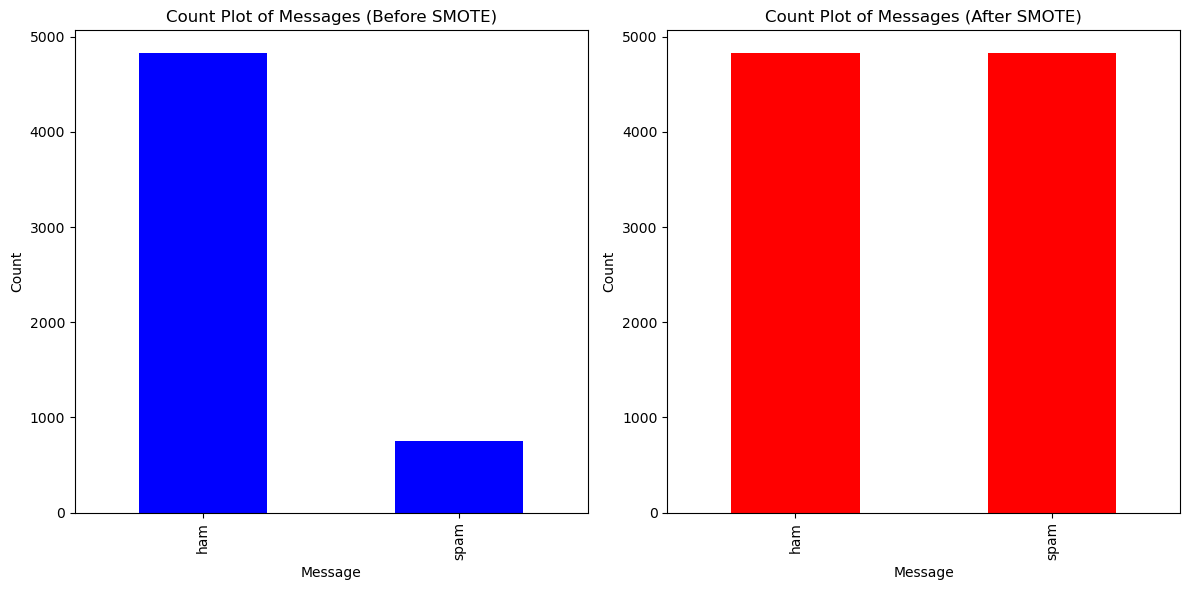

In [13]:
# Plot count plots for messages before and after SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data['v1'].value_counts().plot(kind='bar', color='blue')
plt.title('Count Plot of Messages (Before SMOTE)')
plt.xlabel('Message')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
pd.Series(y_smote).value_counts().plot(kind='bar', color='red')
plt.title('Count Plot of Messages (After SMOTE)')
plt.xlabel('Message')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [14]:

# Convert DataFrame to numpy arrays
X_smote_array = X_smote_df.values
y_smote_array = y_smote_df.values

# Split the SMOTE resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_array, y_smote_array, test_size=0.2, random_state=42)

# Initialize models
models = {
    "J48": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier()
}

# Initialize results dictionary
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-score": []}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='spam')
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    
    # Store results in dictionary
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-score"].append(f1)

# Convert results to DataFrame
results_df_smote = pd.DataFrame(results)

# Display results
print(results_df_smote)


           Model  Accuracy  Precision    Recall  F1-score
0            J48  0.983938   0.982068  0.985185  0.983624
1  Random Forest  0.992746   1.000000  0.985185  0.992537
2    Naive Bayes  0.990155   0.986345  0.993651  0.989984
3            KNN  0.992228   0.998927  0.985185  0.992009


NEARMSS Analysis

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import NearMiss

# Load the dataset
data = pd.read_csv('spam (1).csv',encoding="ISO-8859-1")

In [16]:
data = data[['v1','v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:

# Text preprocessing (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['v2'])

# Target variable
y = data['v1']

# Apply NearMiss
nearmiss = NearMiss()
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_tfidf, y)
X_nearmiss_df = pd.DataFrame(X_nearmiss.toarray())
y_nearmiss_df = pd.Series(y_nearmiss, name='target')


In [18]:
print(X_nearmiss)

  (4, 8222)	0.7083214865684765
  (4, 1813)	0.4152903056349729
  (4, 8615)	0.4069227202520224
  (4, 3308)	0.40028556488303296
  (5, 1839)	0.6493849349985386
  (5, 3358)	0.7604598649481404
  (6, 7076)	0.34432227110132635
  (6, 5054)	0.47937859684222356
  (6, 5879)	0.35544723183860416
  (6, 1839)	0.26756461591219505
  (6, 1813)	0.4961934813684616
  (6, 8615)	0.24309789859054673
  (6, 8609)	0.1687136157654659
  (6, 1351)	0.3463176761398243
  (7, 5483)	0.6049530552301376
  (7, 2716)	0.4681874386266058
  (7, 4993)	0.5040899011886468
  (7, 3770)	0.3327311044882937
  (7, 8609)	0.22364191670078507
  (8, 5879)	0.5778839234329084
  (8, 1260)	0.44929702423961226
  (8, 3901)	0.5490790294420728
  (8, 1813)	0.40335415514677536
  (9, 5879)	0.5778839234329084
  (9, 1260)	0.44929702423961226
  :	:
  (1493, 5421)	0.29715357669340714
  (1493, 165)	0.29715357669340714
  (1493, 5980)	0.24711832382371418
  (1493, 700)	0.22055484073149725
  (1493, 309)	0.2144896573723602
  (1493, 2834)	0.20491950807548642
  (

In [19]:
print(y_nearmiss)

0        ham
1        ham
2        ham
3        ham
4        ham
        ... 
1489    spam
1490    spam
1491    spam
1492    spam
1493    spam
Name: v1, Length: 1494, dtype: object


In [20]:
# Describe
print("Description after NearMiss:")
print(X_nearmiss_df.describe())

Description after NearMiss:


              0            1       2            3            4     \
count  1494.000000  1494.000000  1494.0  1494.000000  1494.000000   
mean      0.001499     0.004329     0.0     0.000349     0.000167   
std       0.018320     0.034774     0.0     0.009534     0.006473   
min       0.000000     0.000000     0.0     0.000000     0.000000   
25%       0.000000     0.000000     0.0     0.000000     0.000000   
50%       0.000000     0.000000     0.0     0.000000     0.000000   
75%       0.000000     0.000000     0.0     0.000000     0.000000   
max       0.240087     0.654352     0.0     0.265468     0.250180   

              5            6            7       8            9     ...  \
count  1494.000000  1494.000000  1494.000000  1494.0  1494.000000  ...   
mean      0.000204     0.000194     0.000305     0.0     0.001312  ...   
std       0.007883     0.007496     0.008327     0.0     0.017891  ...   
min       0.000000     0.000000     0.000000     0.0     0.000000  ...   
25%     

In [21]:

print(y_nearmiss_df.describe())

count     1494
unique       2
top        ham
freq       747
Name: target, dtype: object


In [22]:
# Shape
print("Shape after NearMiss:")
print(X_nearmiss_df.shape)

Shape after NearMiss:
(1494, 8672)


In [23]:
# Value counts
print("Value counts after NearMiss:")
print(y_nearmiss.value_counts())

Value counts after NearMiss:
ham     747
spam    747
Name: v1, dtype: int64


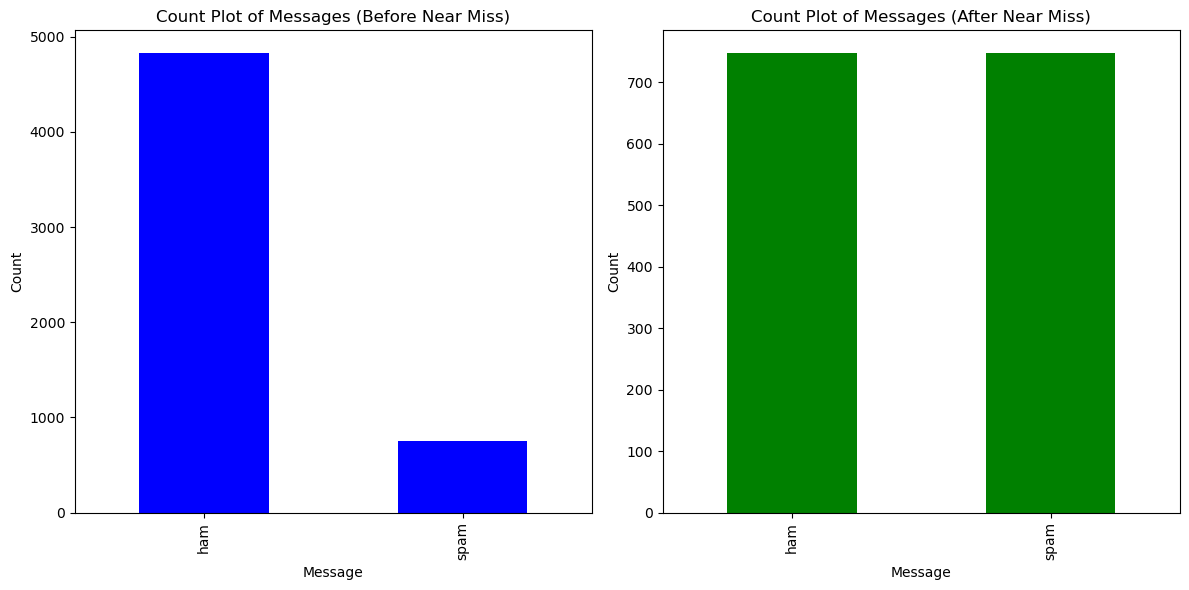

In [24]:
# Plot count plots for messages before and after Near Miss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data['v1'].value_counts().plot(kind='bar', color='blue')
plt.title('Count Plot of Messages (Before Near Miss)')
plt.xlabel('Message')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
pd.Series(y_nearmiss).value_counts().plot(kind='bar', color='green')
plt.title('Count Plot of Messages (After Near Miss)')
plt.xlabel('Message')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [25]:

# Convert DataFrame to numpy arrays
X_nearmiss_array = X_nearmiss_df.values
y_nearmiss_array = y_nearmiss_df.values

# Split the NearMiss resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nearmiss_array, y_nearmiss_array, test_size=0.2, random_state=42)

# Initialize models
models = {
    "J48": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier()
}

# Initialize results dictionary
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-score": []}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='spam')
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    
    # Store results in dictionary
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-score"].append(f1)

# Convert results to DataFrame
results_df_Nearmiss = pd.DataFrame(results)

# Display results
print(results_df_Nearmiss)


           Model  Accuracy  Precision    Recall  F1-score
0            J48  0.889632   0.895425  0.889610  0.892508
1  Random Forest  0.939799   1.000000  0.883117  0.937931
2    Naive Bayes  0.923077   0.933775  0.915584  0.924590
3            KNN  0.602007   1.000000  0.227273  0.370370


NEARMISS VS SMOTE

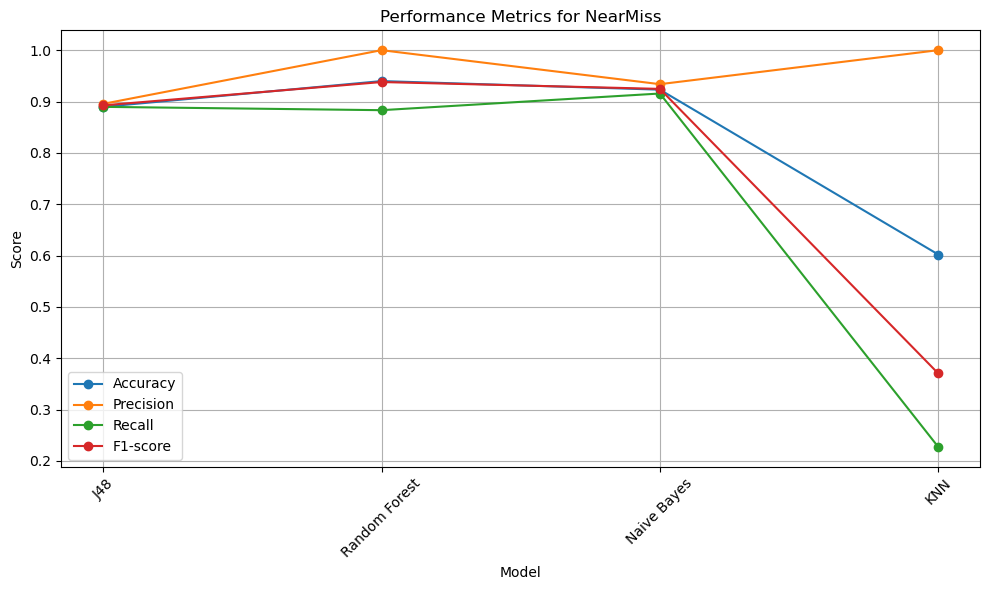

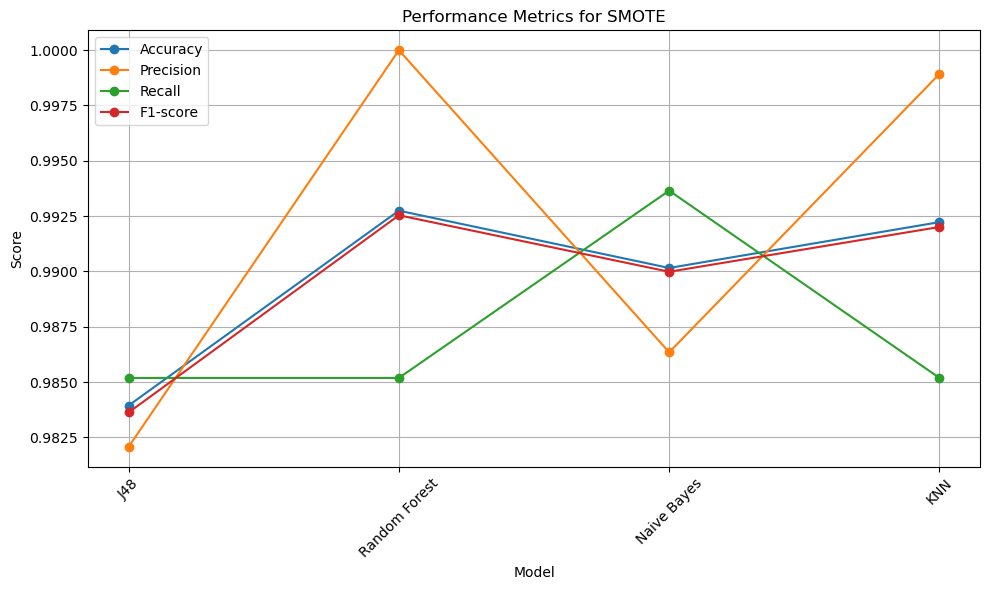

In [26]:
import matplotlib.pyplot as plt

# Define function to plot results
def plot_results(results_df, title):
    plt.figure(figsize=(10, 6))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    for metric in metrics:
        plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot results for NearMiss
plot_results(results_df_Nearmiss, 'Performance Metrics for NearMiss')

# Plot results for SMOTE
plot_results(results_df_smote, 'Performance Metrics for SMOTE')


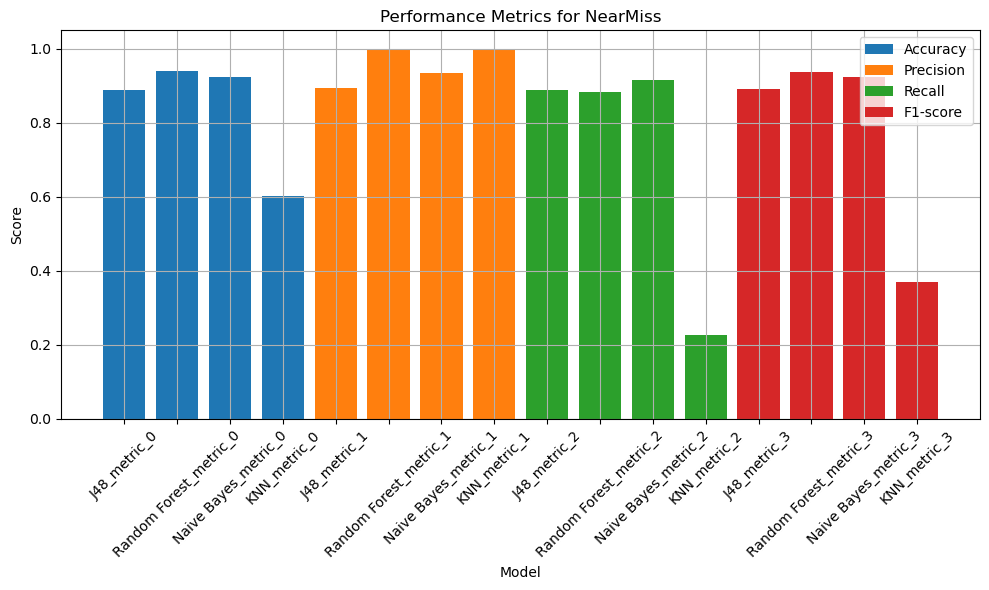

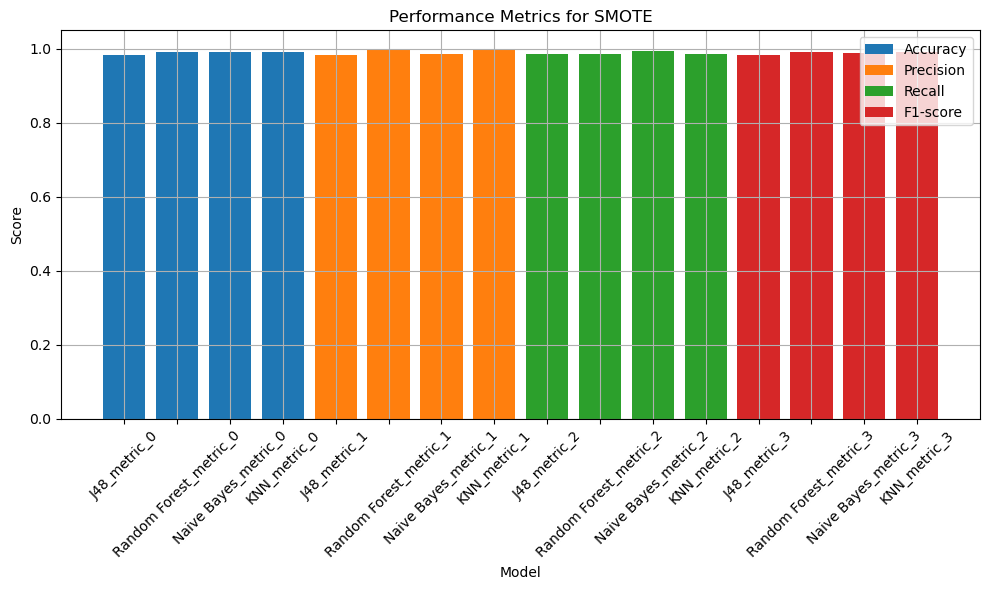

In [27]:
import matplotlib.pyplot as plt

# Define function to plot results as bar plots
def plot_results_bar(results_df, title):
    plt.figure(figsize=(10, 6))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    x = results_df['Model']
    for i, metric in enumerate(metrics):
        plt.bar([str(model) + f'_metric_{i}' for model in x], results_df[metric], label=metric)
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot results for NearMiss as bar plots
plot_results_bar(results_df_Nearmiss, 'Performance Metrics for NearMiss')

# Plot results for SMOTE as bar plots
plot_results_bar(results_df_smote, 'Performance Metrics for SMOTE')


Without Using Data Imbalancing

In [28]:
df=pd.read_csv('spam (1).csv',encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
df = df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [32]:
df.shape

(5572, 2)

In [33]:
x=df['v2'].values
y=df['v1'].values

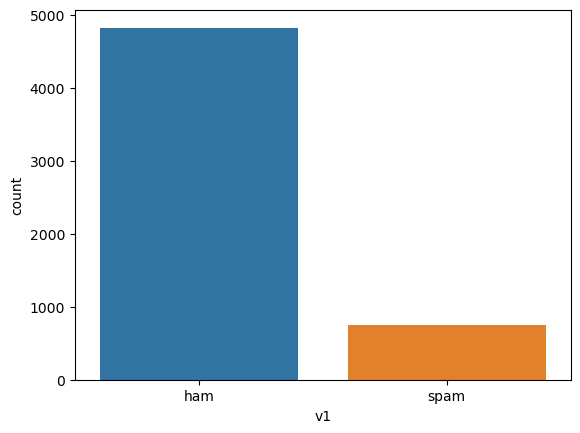

In [34]:
sns.countplot(x='v1', data=df)
plt.show()

In [35]:
df['v1'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

In [36]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [37]:
print('Before preprocessing:',df['v2'][1])

Before preprocessing: Ok lar... Joking wif u oni...


In [38]:
print('Before preprocessing:',df['v2'][100])

Before preprocessing: Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx


In [39]:
print('Before preprocessing:',df['v2'][1000])

Before preprocessing: No..but heard abt tat..


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# n-gram analysis before preprocessing

ham_data = df[df['v1'] == 'ham']['v2']
spam_data = df[df['v1'] == 'spam']['v2']

#A CountVectorizer with n-gram range (e.g., 1-gram to 3-gram)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3))

# Fit and transform the ham text data to get the n-gram features for ham
ham_ngram_features = ngram_vectorizer.fit_transform(ham_data)
ham_ngram_df = pd.DataFrame(ham_ngram_features.toarray(), columns=ngram_vectorizer.get_feature_names_out())

# Fit and transform the spam text data to get the n-gram features for spam
spam_ngram_features = ngram_vectorizer.fit_transform(spam_data)
spam_ngram_df = pd.DataFrame(spam_ngram_features.toarray(), columns=ngram_vectorizer.get_feature_names_out())

print("Ham N-grams:")
print(ham_ngram_df.head())

print("\nSpam N-grams:")
print(spam_ngram_df.head())


Ham N-grams:
   000pes  000pes so  000pes so around  0125698789  0125698789 ring  \
0       0          0                 0           0                0   
1       0          0                 0           0                0   
2       0          0                 0           0                0   
3       0          0                 0           0                0   
4       0          0                 0           0                0   

   0125698789 ring me  0quit  0quit edrunk  0quit edrunk sorry  10  ...  \
0                   0      0             0                   0   0  ...   
1                   0      0             0                   0   0  ...   
2                   0      0             0                   0   0  ...   
3                   0      0             0                   0   0  ...   
4                   0      0             0                   0   0  ...   

   ûò is limping  ûò sound  ûò sound ok  ûò to  ûò to an  ûò very  \
0              0         0            0 

In [41]:
import nltk
nltk.download(['stopwords'])
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

In [43]:
stop_words=stopwords.words('english')
snow=SnowballStemmer('english')

In [44]:
text =[]
# Preprocessing
for message in df['v2']:
  message = message.lower().strip()
  cleaner = re.compile('<. *?>')
  message = re.sub(cleaner,' ', message)
  message = re.sub(r"[^a-zA-Z0-9]"," ",message)
  message = re.sub(r'\d+', '',message)
  words = [snow.stem(word) for word in message.split() if word not in stopwords.words('english')]
  text.append(' '.join(words))

In [45]:
print('After preprocessing:',text[1])
print('After preprocessing:',text[100])
print('After preprocessing:',text[1000])

After preprocessing: ok lar joke wif u oni
After preprocessing: okay name ur price long legal wen pick u ave x am xx
After preprocessing: heard abt tat


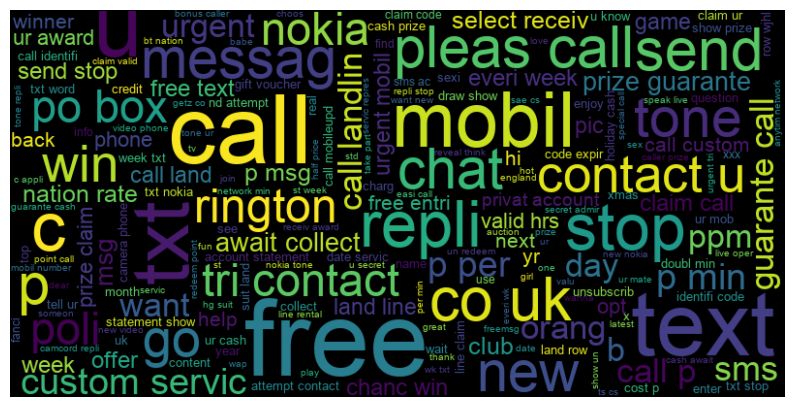

In [46]:
# Plot word cloud to visualize frequent word
df['tokenized_text'] = text
spam_messages = ' '.join(df[df['v1'] == 'spam']['tokenized_text'])
wordcloud = WordCloud(font_path="./arial.ttf",width=800, height=400, random_state=21, max_font_size=110).generate(spam_messages)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

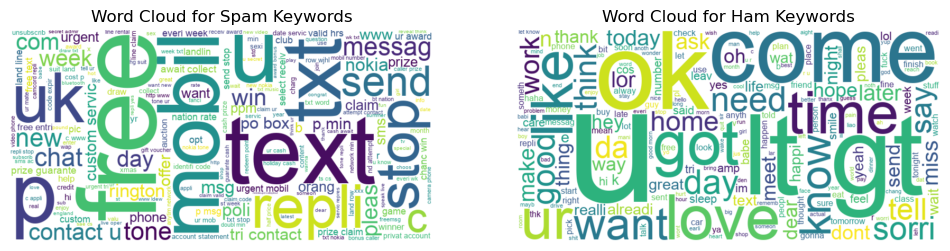

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


spam_data = df[df['v1'] == 'spam']['tokenized_text']
ham_data = df[df['v1'] == 'ham']['tokenized_text']

# Combine the text data into strings
spam_text = ' '.join(spam_data)
ham_text = ' '.join(ham_data)

# Create stopwords list including NLTK and scikit-learn stopwords
stopwords_combined = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))

# Create WordCloud objects for spam and ham
spam_wordcloud = WordCloud(stopwords=stopwords_combined, background_color='white', font_path="./arial.ttf",width=800, height=400).generate(spam_text)
ham_wordcloud = WordCloud(stopwords=stopwords_combined, background_color='white', font_path="./arial.ttf",width=800, height=400).generate(ham_text)

# Plot the WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Keywords')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Keywords')
plt.axis('off')

plt.show()


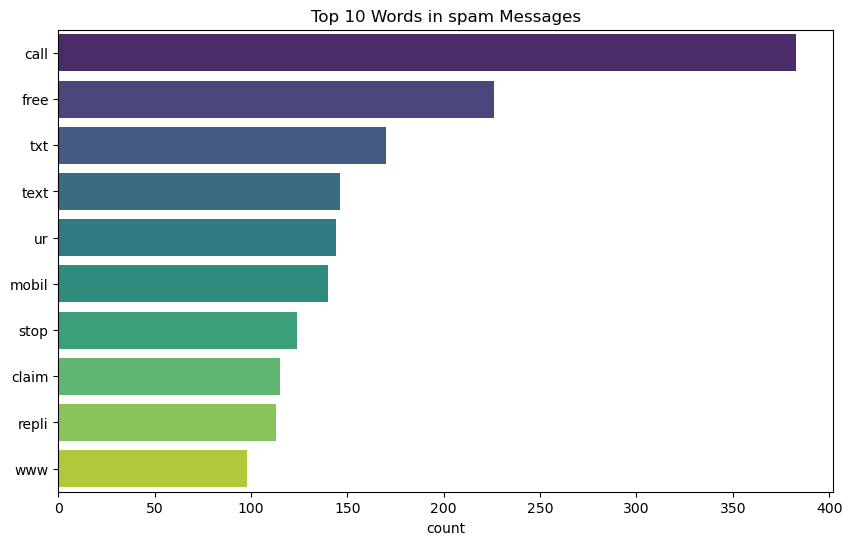

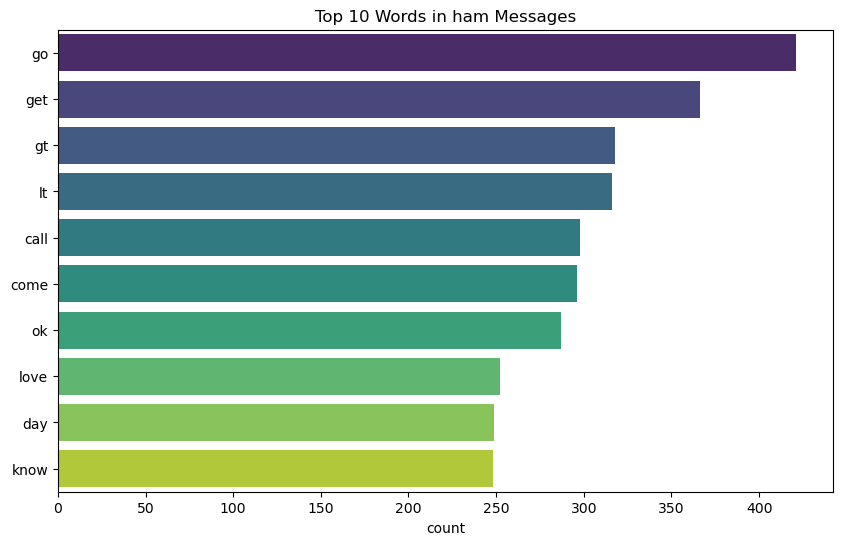

In [48]:
def plot_top_words(data, category, n=10):
    cv = CountVectorizer()
    words = cv.fit_transform(data[data['v1'] == category]['tokenized_text'])
    word_freq = pd.DataFrame(words.sum(axis=0), columns=cv.get_feature_names_out()).T
    word_freq.columns = ['count']
    word_freq = word_freq.sort_values(by='count', ascending=False).head(n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y=word_freq.index, data=word_freq, palette='viridis')
    plt.title(f'Top {n} Words in {category} Messages')
    plt.show()

# Plotting top 10 words in spam messages
plot_top_words(df, 'spam')

# Plotting top 10 words in non-spam messages
plot_top_words(df, 'ham')

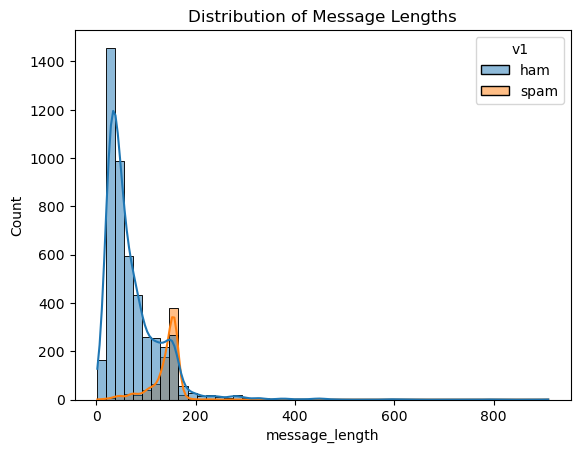

In [49]:
df['message_length'] = df['v2'].apply(len)
sns.histplot(df, x='message_length', hue='v1', bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

ham_data = df[df['v1'] == 'ham']['tokenized_text']
spam_data = df[df['v1'] == 'spam']['tokenized_text']

# Create a CountVectorizer with n-gram range (e.g., 1-gram to 3-gram)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3))


ham_ngram_features = ngram_vectorizer.fit_transform(ham_data)
ham_ngram_df = pd.DataFrame(ham_ngram_features.toarray(), columns=ngram_vectorizer.get_feature_names_out())

# Fit and transform the spam text data to get the n-gram features for spam
spam_ngram_features = ngram_vectorizer.fit_transform(spam_data)
spam_ngram_df = pd.DataFrame(spam_ngram_features.toarray(), columns=ngram_vectorizer.get_feature_names_out())


print("Ham N-grams:")
print(ham_ngram_df.head())

print("\nSpam N-grams:")
print(spam_ngram_df.head())


Ham N-grams:
   aa  aa exhaust  aa exhaust hang  aah  aah bless  aah bless arm  aah cuddl  \
0   0           0                0    0          0              0          0   
1   0           0                0    0          0              0          0   
2   0           0                0    0          0              0          0   
3   0           0                0    0          0              0          0   
4   0           0                0    0          0              0          0   

   aah cuddl would  aah speak  aah speak tomo  ...  zoe hit im  zogtorius  \
0                0          0               0  ...           0          0   
1                0          0               0  ...           0          0   
2                0          0               0  ...           0          0   
3                0          0               0  ...           0          0   
4                0          0               0  ...           0          0   

   zogtorius stare  zogtorius stare phone  

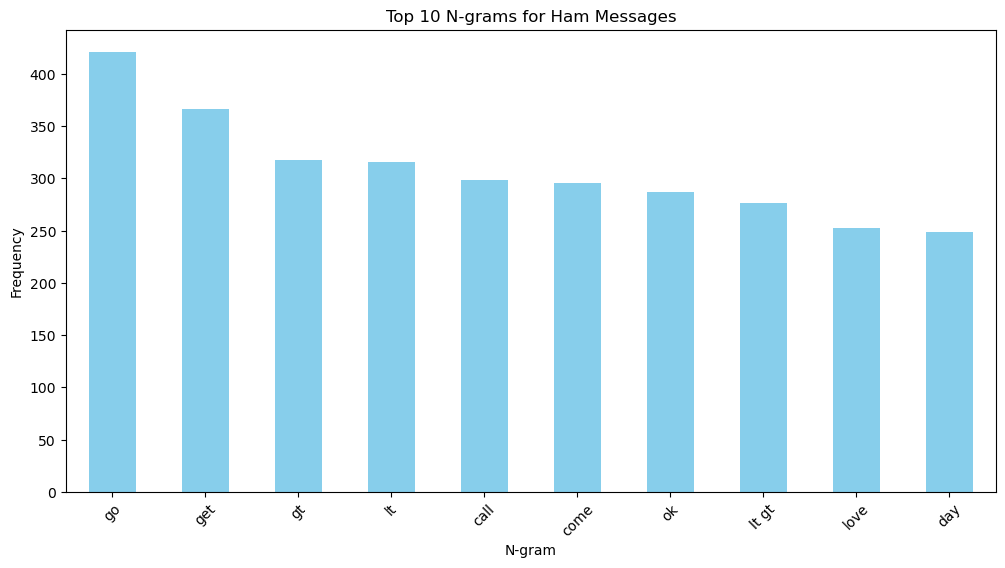

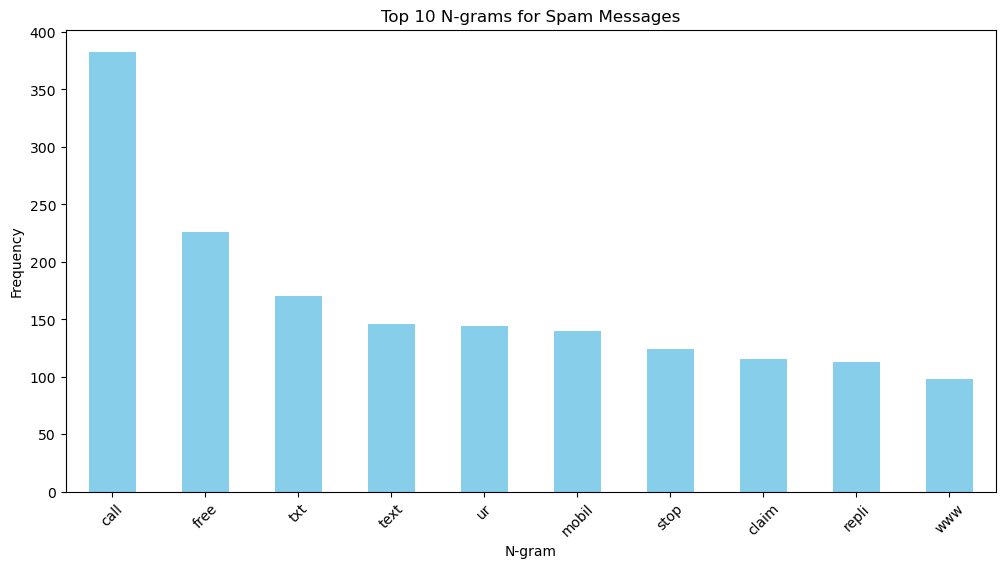

In [51]:
import matplotlib.pyplot as plt

# Function to plot the top N n-grams
def plot_top_ngrams(ngram_df, category, top_n=10):
    # Calculate the total count for each n-gram
    total_counts = ngram_df.sum(axis=0)

    # Sort the n-grams based on total counts
    sorted_ngrams = total_counts.sort_values(ascending=False)

    # Select the top N n-grams
    top_ngrams = sorted_ngrams.head(top_n)

    # Plotting
    plt.figure(figsize=(12, 6))
    top_ngrams.plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} N-grams for {category} Messages')
    plt.xlabel('N-gram')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot top N n-grams for ham messages
plot_top_ngrams(ham_ngram_df, 'Ham')

# Plot top N n-grams for spam messages
plot_top_ngrams(spam_ngram_df, 'Spam')


In [52]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fitting and transformming the tokenized text
X_tfidf = tfidf_vectorizer.fit_transform(df['tokenized_text'])

# Extracting feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sum the TF-IDF scores for each feature across all messages
feature_sum = X_tfidf.sum(axis=0)

# Creating a DataFrame with feature names and their corresponding sum of TF-IDF scores
feature_df = pd.DataFrame({'feature': feature_names, 'tfidf_sum': feature_sum.flat})

# Sorting the DataFrame by TF-IDF scores in descending order and print the top 10 features
top_features = feature_df.sort_values(by='tfidf_sum', ascending=False).head(10)['feature'].values

print("Top 10 Features:")
print(top_features)

Top 10 Features:
['call' 'ok' 'go' 'get' 'come' 'ur' 'gt' 'lt' 'know' 'time']


In [53]:
# Splitting the data into features (X) and target variable (y)
X = df['tokenized_text']
y = df['v1']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4457,) (4457,)
Testing set shape: (1115,) (1115,)


In [54]:
# TF-IDF Vectorization with n-grams
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  #unigrams and bigrams
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)


# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, y_train)
knn_predictions = knn_classifier.predict(X_test_tfidf)


# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_test_tfidf)


# J48 (Decision Tree)
j48_classifier = DecisionTreeClassifier(random_state=42)
j48_classifier.fit(X_train_tfidf, y_train)
j48_predictions = j48_classifier.predict(X_test_tfidf)


# Evaluation Metrics
def calculate_metrics(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, pos_label='spam')
    recall = metrics.recall_score(y_true, y_pred, pos_label='spam')
    f1 = metrics.f1_score(y_true, y_pred, pos_label='spam')

    return accuracy, precision, recall, f1

# List to store metrics 
models_metrics = []

# Calculate metrics for each model
nb_metrics = calculate_metrics(y_test, nb_predictions)
knn_metrics = calculate_metrics(y_test, knn_predictions)
rf_metrics = calculate_metrics(y_test, rf_predictions)
j48_metrics = calculate_metrics(y_test, j48_predictions)

# Append metrics to the list
models_metrics.append(('Naive Bayes',) + nb_metrics)
models_metrics.append(('K-Nearest Neighbors',) + knn_metrics)
models_metrics.append(('Random Forest',) + rf_metrics)
models_metrics.append(('J48 (Decision Tree)',) + j48_metrics)

# Create a DataFrame
metrics_df = pd.DataFrame(models_metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the DataFrame
print(metrics_df)



                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.968610   1.000000  0.766667  0.867925
1  K-Nearest Neighbors  0.920179   1.000000  0.406667  0.578199
2        Random Forest  0.977578   1.000000  0.833333  0.909091
3  J48 (Decision Tree)  0.963229   0.903704  0.813333  0.856140


In [55]:
from sklearn.model_selection import cross_val_score

classifiers = [
    ('Naive Bayes', nb_classifier),
    ('K-Nearest Neighbors', knn_classifier),
    ('Random Forest', rf_classifier),
    ('J48 (Decision Tree)', j48_classifier)
]

# Perform k-fold cross-validation
k_fold = 5  
cv_results = []

for model_name, classifier in classifiers:
    accuracy_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=k_fold, scoring='accuracy')
    precision_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=k_fold, scoring='precision_macro')
    recall_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=k_fold, scoring='recall_macro')
    f1_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=k_fold, scoring='f1_macro')

    cv_results.append((model_name,
                      np.mean(accuracy_scores),
                      np.mean(precision_scores),
                      np.mean(recall_scores),
                      np.mean(f1_scores)))

# Create a DataFrame for k-fold cross-validation results
cv_results_df = pd.DataFrame(cv_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the k-fold cross-validation results
print("K-Fold Cross-Validation Results:")
print(cv_results_df)


K-Fold Cross-Validation Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.973075   0.983071  0.900875  0.936588
1  K-Nearest Neighbors  0.903299   0.949788  0.639041  0.690625
2        Random Forest  0.977338   0.983017  0.918932  0.947736
3  J48 (Decision Tree)  0.956699   0.914007  0.896451  0.904417


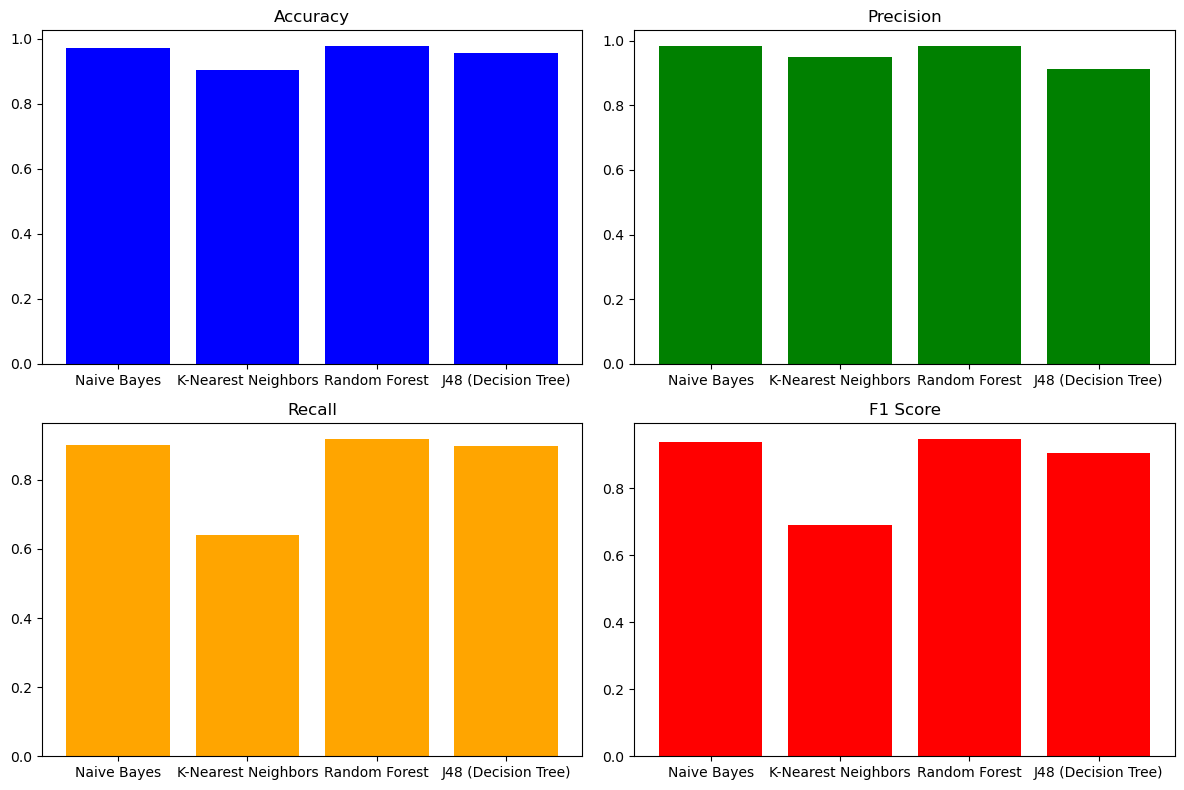

In [56]:
# Plot the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Accuracy
axes[0, 0].bar(cv_results_df['Model'], cv_results_df['Accuracy'], color='blue')
axes[0, 0].set_title('Accuracy')

# Precision
axes[0, 1].bar(cv_results_df['Model'], cv_results_df['Precision'], color='green')
axes[0, 1].set_title('Precision')

# Recall
axes[1, 0].bar(cv_results_df['Model'], cv_results_df['Recall'], color='orange')
axes[1, 0].set_title('Recall')

# F1 Score
axes[1, 1].bar(cv_results_df['Model'], cv_results_df['F1 Score'], color='red')
axes[1, 1].set_title('F1 Score')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
%pip install flask-ngrok

Note: you may need to restart the kernel to use updated packages.


In [58]:
import joblib
# Creating a pickle file for the CountVectorizer
joblib.dump(tfidf_vectorizer, open('tfidf_vectorizer.joblib', 'wb'))

In [59]:
import joblib
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'rf_classifier.joblib'
joblib.dump(rf_classifier, open(filename, 'wb'))